In [1]:
import numpy as np
import scipy 
import scipy.signal
import random
import numpy.fft
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
exp = np.exp
arange = np.arange

In [2]:
def sym_derivative(x,y,smooth=None):
    #if smooth=='yes':
     #   y_in=scipy.signal.savgol_filter(y,51,3)
    #elif smooth=='no':
      #  y_in=y
    deriv=np.zeros(len(x))
    for i in range(len(x)):
        if i==0:
            dy=y[i+1]-y[i]
            dx=x[i+1]-x[i]
            deriv[i]=dy/dx
        elif i==len(x)-1:
            dy=y[i]-y[i-1]
            dx=x[i]-x[i-1]
            deriv[i]=dy/dx
        else:
            dy=y[i+1]-y[i-1]
            dx=x[i+1]-x[i-1]
            deriv[i]=dy/dx
    return deriv

In [3]:
def E_fit_func(x,N,c):
    return -N*scipy.tanh(1/x)+c

def sech(x):
    return scipy.cosh(x)**(-1.)

def CV_fit_func(x,N,k,c):
    return (N/((x+k)**2.))*((sech(1/(x+c))**2.))


In [4]:
def fit_func(x,B,T_c,a):
    return (B*(abs(T_c-x)**(-1*a)))

def fit_func2(x,B1,B2,Tc,a1,a2):
    return np.piecewise(x, [x<Tc, x>Tc], [lambda x:B1*((Tc-x)**(-1*a1)), lambda x:B2*((x-Tc)**(-1*a2))])

In [5]:
def lin_fit(x,B,a):#(x,B1,B2,Tc,a1,a2):
    return a*x+B
    #return np.piecewise(x, [x<Tc,x>Tc], [lambda x:B1-(a1*x), lambda x:B2-(a2*x)])

In [6]:
def mag_fit(x,B,T_c,b):
    return np.piecewise(x, [x<=T_c,x>T_c], [lambda x:B*(abs((T_c-x))**b), lambda x:0])

def ED_fit(x,G,Tc,e,k):
    return np.piecewise(x, [x<=Tc,x>Tc], [lambda x:G*(abs((Tc-x))**e)+k, lambda x:k])

#Analysis for varying EPR Density

##$\rho_{EPR}=0.1$

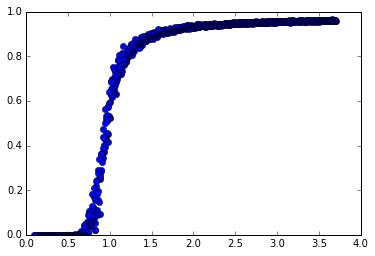

In [9]:
array1=np.loadtxt('1D_Bell_State_3.7_0.1_1100_50000_tau55000_1x40_seeded0.1_1.txt')
T1=array1[0]
E1=array1[1]
CV1=array1[2]
M1=array1[3]
Chi1=array1[4]
ED1=array1[5]
D1=array1[6]
E1_smooth=scipy.signal.savgol_filter(E1,51,3)
CV1_deriv=sym_derivative(T1,E1_smooth)
ED1_smooth=scipy.signal.savgol_filter(ED1,51,3)
D1_deriv=sym_derivative(T1,ED1_smooth)

plt.plot(T1,ED1,'bo')
plt.show()

C1= 46.8115833275 +/- 0.529216268679
TcM_1= 0.90909950773 +/- 6.41903675525e-06
b1= 0.282500801547 +/- 0.0106547214524


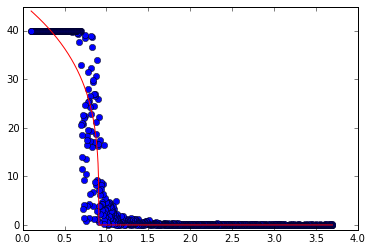

In [11]:
popt_M1, pcov_M1 = curve_fit(mag_fit, T1, abs(M1), p0=[46.8115833275,0.90909950773,0.282500801547])
perr_M1 = np.sqrt(np.diag(pcov_M1))
C1=popt_M1[0]
C1_err=perr_M1[0]
print('C1=', C1, '+/-', C1_err)
TcM_1=popt_M1[1]
TcM_1_err=perr_M1[1]
print('TcM_1=', TcM_1, '+/-', TcM_1_err)
b1=popt_M1[2]
b1_err=perr_M1[2]
print('b1=', b1, '+/-', b1_err)
#c=popt[3]
#print(c)
plt.plot(T1,abs(M1),'bo')
plt.plot(T1,mag_fit(T1,C1,TcM_1,b1),'r-')
plt.ylim(-1)
plt.show()

B1_1= 12.7104016678 +/- 2.11276442994
B2_1= 17.9000692007 +/- 2.02602640655
Tc_1= 0.910722165592 +/- 0.000952155575463
a1_1= 0.428975193641 +/- 0.0551200676813
a2_1= 0.371524765083 +/- 0.0417951581356


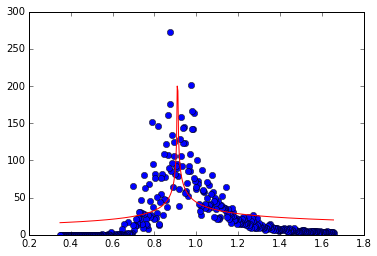

In [13]:
popt_CV1, pcov_CV1 = curve_fit(fit_func2, T1[624:1024], CV1[624:1024], p0=[7.92748792466,17.6200177409, 0.90909950773, 0.440880962777,0.383661727796])
perr_CV1 = np.sqrt(np.diag(pcov_CV1))
B1_1=popt_CV1[0]
B1_1_err=perr_CV1[0]
print('B1_1=', B1_1, '+/-', B1_1_err)
B2_1=popt_CV1[1]
B2_1_err=perr_CV1[1]
print('B2_1=', B2_1, '+/-', B2_1_err)
Tc_1=popt_CV1[2]
Tc_1_err=perr_CV1[2]
print('Tc_1=', Tc_1, '+/-', Tc_1_err)
a1_1=popt_CV1[3]
a1_1_err=perr_CV1[3]
print('a1_1=', a1_1, '+/-', a1_1_err)
a2_1=popt_CV1[4]
a2_1_err=perr_CV1[4]
print('a2_1=', a2_1, '+/-', a2_1_err)
plt.plot(T1[624:1024],CV1[624:1024],'bo')
plt.plot(T1[624:1024],fit_func2(T1[624:1024],B1_1,B2_1,Tc_1,a1_1,a2_1),'r-')
plt.show()

##$\rho_{EPR}=0.2$

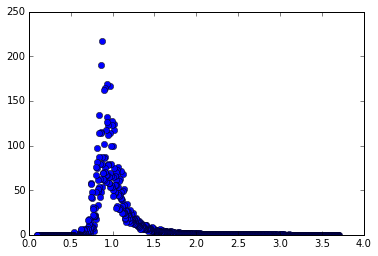

In [14]:
array2=np.loadtxt('1D_Bell_State_3.7_0.1_1100_50000_tau55000_1x40_seeded0.2_1.txt')
T2=array2[0]
E2=array2[1]
CV2=array2[2]
M2=array2[3]
Chi2=array2[4]
ED2=array2[5]
D2=array2[6]
E2_smooth=scipy.signal.savgol_filter(E2,51,3)
CV2_deriv=sym_derivative(T2,E2_smooth)
ED2_smooth=scipy.signal.savgol_filter(ED2,51,3)
D2_deriv=sym_derivative(T2,ED2_smooth)

plt.plot(T2,CV2,'bo')
plt.show()

N2= 84.7831925339 +/- 0.429656828349
c2= -17.842106796 +/- 0.195861973266


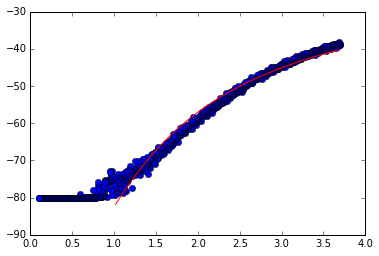

In [43]:
popt_E2, pcov_E2 = curve_fit(E_fit_func, T2[:820], E2[:820], p0=[40,-49.])
perr_E2 = np.sqrt(np.diag(pcov_E2))
N2=popt_E2[0]
N2_err=perr_E2[0]
print('N2=', N2, '+/-', N2_err)
c2=popt_E2[1]
c2_err=perr_E2[1]
print('c2=', c2, '+/-', c2_err)

plt.plot(T2,E2,'bo')
plt.plot(T2[:820],E_fit_func(T2[:820],N2,c2),'r-')
plt.show()

A2= 68.0449345032 +/- 2.33059242212
k2= 0.128987915098 +/- 0.0407670722132
d2= -0.452011003274 +/- 0.00906470627635


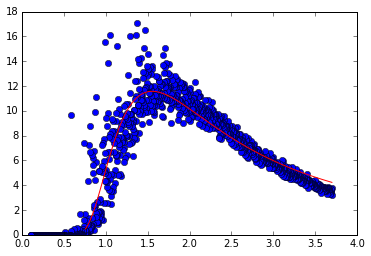

In [45]:
popt_CV2, pcov_CV2 = curve_fit(CV_fit_func, T2[:900], CV2[:900], p0=[40,0.5,-0.5])
perr_CV2 = np.sqrt(np.diag(pcov_CV2))
A2=popt_CV2[0]
A2_err=perr_CV2[0]
print('A2=', A2, '+/-', A2_err)
k2=popt_CV2[1]
k2_err=perr_CV2[1]
print('k2=', k2,'+/-', k2_err)
d2=popt_CV2[2]
d2_err=perr_CV2[2]
print('d2=', d2, '+/-', d2_err)

plt.plot(T2,CV2,'bo')
plt.plot(T2[:900],CV_fit_func(T2[:900],A2,k2,d2),'r-')
plt.show()

##$\rho_{EPR}=0.4$

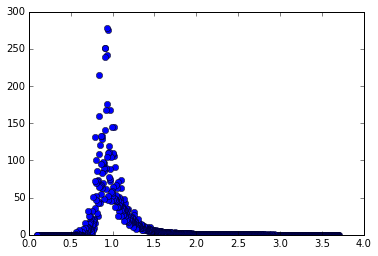

In [15]:
array3=np.loadtxt('1D_Bell_State_3.7_0.1_1100_50000_tau55000_1x40_seeded0.4_1.txt')
T3=array3[0]
E3=array3[1]
CV3=array3[2]
M3=array3[3]
Chi3=array3[4]
ED3=array3[5]
D3=array3[6]
E3_smooth=scipy.signal.savgol_filter(E3,51,3)
CV3_deriv=sym_derivative(T3,E3_smooth)
ED3_smooth=scipy.signal.savgol_filter(ED3,51,3)
D3_deriv=sym_derivative(T3,ED3_smooth)

plt.plot(T3,CV3,'bo')
plt.show()

C3= 47.6819862468 +/- 0.564266513707
TcM_3= 0.894663377012 +/- 0.00287001140724
b3= 0.276893390879 +/- 0.0125384374023


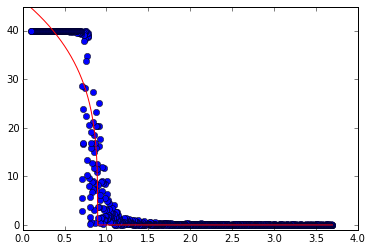

In [16]:
popt_M3, pcov_M3 = curve_fit(mag_fit, T3, abs(M3), p0=[45.3181808756,0.89646956618,0.177538569087])
perr_M3 = np.sqrt(np.diag(pcov_M3))
C3=popt_M3[0]
C3_err=perr_M3[0]
print('C3=', C3, '+/-', C3_err)
TcM_3=popt_M3[1]
TcM_3_err=perr_M3[1]
print('TcM_3=', TcM_3, '+/-', TcM_3_err)
b3=popt_M3[2]
b3_err=perr_M3[2]
print('b3=', b3, '+/-', b3_err)
#c=popt[3]
#print(c)
plt.plot(T3,abs(M3),'bo')
plt.plot(T3,mag_fit(T3,C3,TcM_3,b3),'r-')
plt.ylim(-1)
plt.show()

B1_3= 11.6972034 +/- 2.66748495436
B2_3= 19.8823781311 +/- 2.06811781274
Tc_3= 0.893477915878 +/- 0.000869463092459
a1_3= 0.363641886601 +/- 0.0771196229537
a2_3= 0.43463565545 +/- 0.0358622282778


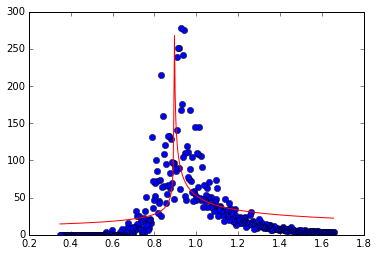

In [17]:
popt_CV3, pcov_CV3 = curve_fit(fit_func2, T3[624:1024], CV3[624:1024], p0=[7.92748792466,17.6200177409, 0.894663377012, 0.440880962777,0.383661727796])
perr_CV3 = np.sqrt(np.diag(pcov_CV3))
B1_3=popt_CV3[0]
B1_3_err=perr_CV3[0]
print('B1_3=', B1_3, '+/-', B1_3_err)
B2_3=popt_CV3[1]
B2_3_err=perr_CV3[1]
print('B2_3=', B2_3, '+/-', B2_3_err)
Tc_3=popt_CV3[2]
Tc_3_err=perr_CV3[2]
print('Tc_3=', Tc_3, '+/-', Tc_3_err)
a1_3=popt_CV3[3]
a1_3_err=perr_CV3[3]
print('a1_3=', a1_3, '+/-', a1_3_err)
a2_3=popt_CV3[4]
a2_3_err=perr_CV3[4]
print('a2_3=', a2_3, '+/-', a2_3_err)
plt.plot(T3[624:1024],CV3[624:1024],'bo')
plt.plot(T3[624:1024],fit_func2(T3[624:1024],B1_3,B2_3,Tc_3,a1_3,a2_3),'r-')
plt.show()

G3= -0.987620675412 +/- 0.00935370195076
TcED_3= 0.952027047063 +/- 0.000631827060059
e3= 0.127650304285 +/- 0.00753005631695
edk3= 0.91065233012 =/- 0.00275142662839


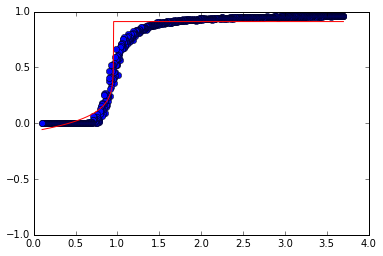

In [18]:
popt_ED3, pcov_ED3 = curve_fit(ED_fit, T3, ED3, p0=[-0.983942293968,0.951960404909, 0.117479588942 ,0.911546059519])
perr_ED3 = np.sqrt(np.diag(pcov_ED3))
G3=popt_ED3[0]
G3_err=perr_ED3[0]
print('G3=', G3, '+/-', G3_err)
TcED_3=popt_ED3[1]
TcED_3_err=perr_ED3[1]
print('TcED_3=', TcED_3, '+/-', TcED_3_err)
e3=popt_ED3[2]
e3_err=perr_ED3[2]
print('e3=', e3, '+/-', e3_err)
edk3=popt_ED3[3]
edk3_err=perr_ED3[3]
print('edk3=', edk3, '=/-', edk3_err)
plt.plot(T3,ED3,'bo')
plt.plot(T3,ED_fit(T3,G3,TcED_3,e3,edk3),'r-')
plt.ylim(-1)
plt.show()

F1_3= 0.00183277758086 +/- 0.000158595841577
F2_3= 0.00217580045366 +/- 0.000110729103017
TcD_3= 0.953606248219 +/- 0.000429904143308
d1_3= 0.472925316756 +/- 0.0265900256532
d2_3= 0.42557736634 +/- 0.0207799281528


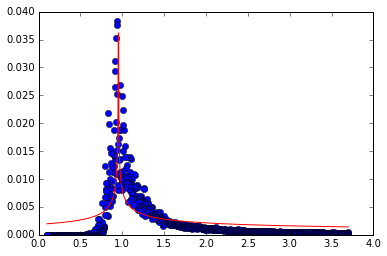

In [20]:
popt_D3, pcov_D3 = curve_fit(fit_func2, T3, D3, p0=[0.00128467710098,0.00217565038172,0.952027047063, 0.444910663178,0.444615269344])
perr_D3 = np.sqrt(np.diag(pcov_D3))
F1_3=popt_D3[0]
F1_3_err=perr_D3[0]
print('F1_3=', F1_3, '+/-', F1_3_err)
F2_3=popt_D3[1]
F2_3_err=perr_D3[1]
print('F2_3=', F2_3, '+/-', F2_3_err)
TcD_3=popt_D3[2]
TcD_3_err=perr_D3[2]
print('TcD_3=', TcD_3, '+/-', TcD_3_err)
d1_3=popt_D3[3]
d1_3_err=perr_D3[3]
print('d1_3=', d1_3, '+/-', d1_3_err)
d2_3=popt_D3[4]
d2_3_err=perr_D3[4]
print('d2_3=', d2_3, '+/-', d2_3_err)
plt.plot(T3,D3,'bo')
plt.plot(T3,fit_func2(T3,F1_3,F2_3,TcD_3,d1_3,d2_3),'r-')
plt.show()

##$\rho_{EPR}=0.5$

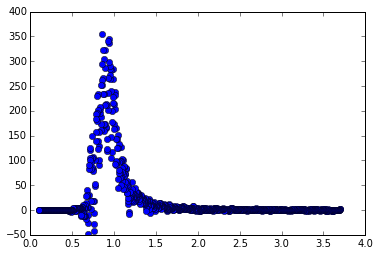

In [21]:
array4=np.loadtxt('1D_Bell_State_3.7_0.1_1100_50000_tau55000_1x40_seeded0.5_1.txt')
T4=array4[0]
E4=array4[1]
CV4=array4[2]
M4=array4[3]
Chi4=array4[4]
ED4=array4[5]
D4=array4[6]
E4_smooth=scipy.signal.savgol_filter(E4,51,3)
CV4_deriv=sym_derivative(T4,E4_smooth)
ED4_smooth=scipy.signal.savgol_filter(ED4,51,3)
D4_deriv=sym_derivative(T4,ED4_smooth)

plt.plot(T4,CV4_deriv,'bo')
plt.show()

C4= 45.3496595874 +/- 0.460138092975
TcM_4= 0.880956475965 +/- 0.00184899085959
b4= 0.168245062984 +/- 0.00896291947193


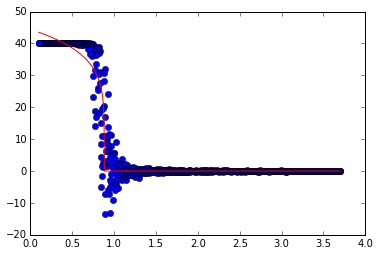

In [25]:
popt_M4, pcov_M4 = curve_fit(mag_fit, T4, M4, p0=[-44.2265262335,0.9, 0.0727521841215])
perr_M4 = np.sqrt(np.diag(pcov_M4))
C4=popt_M4[0]
C4_err=perr_M4[0]
print('C4=', C4, '+/-', C4_err)
TcM_4=popt_M4[1]
TcM_4_err=perr_M4[1]
print('TcM_4=', TcM_4, '+/-', TcM_4_err)
b4=popt_M4[2]
b4_err=perr_M4[2]
print('b4=', b4, '+/-', b4_err)
#c=popt[3]
#print(c)
plt.plot(T4,M4,'bo')
plt.plot(T4,mag_fit(T4,C4,TcM_4,b4),'r-')
plt.show()

B1_4= 7.41692394525 +/- 1.14858349754
B2_4= 11.5049923107 +/- 0.666673805379
Tc_4= 0.880242944658 +/- 0.000430163363241
a1_4= 0.409784625435 +/- 0.0509908429283
a2_4= 0.514292378246 +/- 0.019211905067


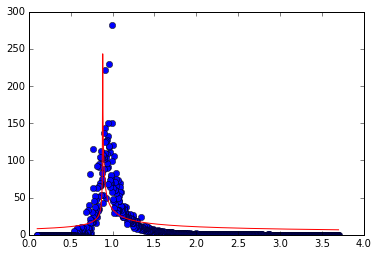

In [27]:
popt_CV4, pcov_CV4 = curve_fit(fit_func2, T4, CV4, p0=[1.67092422408,6.22674029916,0.880956475965,0.296238540252,0.595167449883])
perr_CV4 = np.sqrt(np.diag(pcov_CV4))
B1_4=popt_CV4[0]
B1_4_err=perr_CV4[0]
print('B1_4=', B1_4, '+/-', B1_4_err)
B2_4=popt_CV4[1]
B2_4_err=perr_CV4[1]
print('B2_4=', B2_4, '+/-', B2_4_err)
Tc_4=popt_CV4[2]
Tc_4_err=perr_CV4[2]
print('Tc_4=', Tc_4, '+/-', Tc_4_err)
a1_4=popt_CV4[3]
a1_4_err=perr_CV4[3]
print('a1_4=', a1_4, '+/-', a1_4_err)
a2_4=popt_CV4[4]
a2_4_err=perr_CV4[4]
print('a2_4=', a2_4, '+/-', a2_4_err)
plt.plot(T4,CV4,'bo')
plt.plot(T4,fit_func2(T4,B1_4,B2_4,Tc_4,a1_4,a2_4),'r-')
plt.show()

G4= -0.944465881924 +/- 0.0118459811082
TcED_4= 0.896561626372 +/- 0.00160408292781
e4= 0.0649677463079 +/- 0.00894125164348
edk4= 0.90067499955 +/- 0.00338828014185


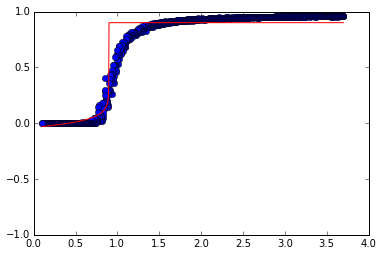

In [29]:
popt_ED4, pcov_ED4 = curve_fit(ED_fit, T4, ED4, p0=[-1.14699442548,0.9, 0.123962697648,0.984418022317])
perr_ED4 = np.sqrt(np.diag(pcov_ED4))
G4=popt_ED4[0]
G4_err=perr_ED4[0]
print('G4=', G4, '+/-', G4_err)
TcED_4=popt_ED4[1]
TcED_4_err=perr_ED4[1]
print('TcED_4=', TcED_4, '+/-', TcED_4_err)
e4=popt_ED4[2]
e4_err=perr_ED4[2]
print('e4=', e4, '+/-', e4_err)
edk4=popt_ED4[3]
edk4_err=perr_ED4[3]
print('edk4=', edk4, '+/-', edk4_err)
plt.plot(T4,ED4,'bo')
plt.plot(T4,ED_fit(T4,G4,TcED_4,e4,edk4),'r-')
plt.ylim(-1)
plt.show()

F1_4= 0.000901836389128 +/- 0.000147764918347
F2_4= 0.00250291594848 +/- 9.0421979471e-05
TcD_4= 0.896418803573 +/- 0.000292796918203
d1_4= 0.429381654661 +/- 0.0523611348625
d2_4= 0.465755462029 +/- 0.0124767976157


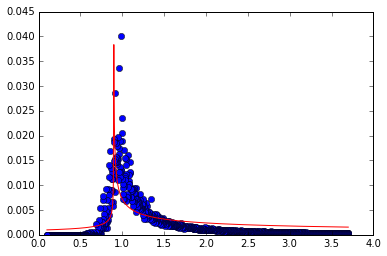

In [30]:
popt_D4, pcov_D4 = curve_fit(fit_func2, T4, D4, p0=[0.000586832348829,0.000667836640527,0.896561626372, 0.570952214006,0.553089160858])
perr_D4 = np.sqrt(np.diag(pcov_D4))
F1_4=popt_D4[0]
F1_4_err=perr_D4[0]
print('F1_4=', F1_4, '+/-', F1_4_err)
F2_4=popt_D4[1]
F2_4_err=perr_D4[1]
print('F2_4=', F2_4, '+/-', F2_4_err)
TcD_4=popt_D4[2]
TcD_4_err=perr_D4[2]
print('TcD_4=', TcD_4, '+/-', TcD_4_err)
d1_4=popt_D4[3]
d1_4_err=perr_D4[3]
print('d1_4=', d1_4, '+/-', d1_4_err)
d2_4=popt_D4[4]
d2_4_err=perr_D4[4]
print('d2_4=', d2_4, '+/-', d2_4_err)
plt.plot(T4,D4,'bo')
plt.plot(T4,fit_func2(T4,F1_4,F2_4,TcD_4,d1_4,d2_4),'r-')
plt.show()

##$\rho_{EPR}=0.8$

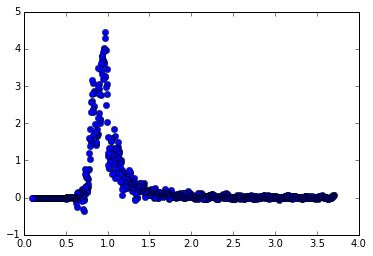

In [22]:
array5=np.loadtxt('1D_Bell_State_3.7_0.1_1100_50000_tau55000_1x40_seeded0.8_1.txt')
T5=array5[0]
E5=array5[1]
CV5=array5[2]
M5=array5[3]
Chi5=array5[4]
ED5=array5[5]
D5=array5[6]
E5_smooth=scipy.signal.savgol_filter(E5,51,3)
CV5_deriv=sym_derivative(T5,E5_smooth)
ED5_smooth=scipy.signal.savgol_filter(ED5,51,3)
D5_deriv=sym_derivative(T5,ED5_smooth)

plt.plot(T5,D5_deriv,'bo')
plt.show()

C5= 43.5078027819 +/- 0.419471422154
TcM_5= 0.863818570359 +/- 0.000984879486151
b5= 0.103887726493 +/- 0.00737503354413


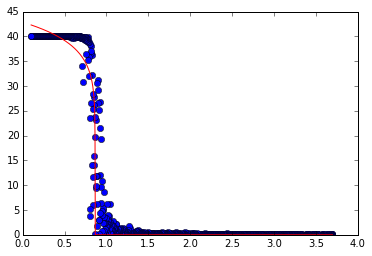

In [34]:
popt_M5, pcov_M5 = curve_fit(mag_fit, T5, abs(M5), p0=[-26.9623676056,0.9, 0.187447401476])
perr_M5 = np.sqrt(np.diag(pcov_M5))
C5=popt_M5[0]
C5_err=perr_M5[0]
print('C5=', C5, '+/-', C5_err)
TcM_5=popt_M5[1]
TcM_5_err=perr_M5[1]
print('TcM_5=', TcM_5, '+/-', TcM_5_err)
b5=popt_M5[2]
b5_err=perr_M5[2]
print('b5=', b5, '+/-', b5_err)
#c=popt[3]
#print(c)
plt.plot(T5,abs(M5),'bo')
plt.plot(T5,mag_fit(T5,C5,TcM_5,b5),'r-')
plt.show()

B1_5= 6.05401766424 +/- 1.25711908104
B2_5= 11.6837334041 +/- 0.674485441597
Tc_5= 0.863582242058 +/- 0.000417195641015
a1_5= 0.358960362668 +/- 0.070592297233
a2_5= 0.541417441867 +/- 0.0186982217423


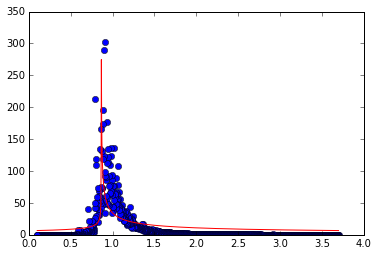

In [36]:
popt_CV5, pcov_CV5 = curve_fit(fit_func2, T5, CV5, p0=[16.0491890468,8.51931186886,0.863818570359, 0.428135431794,0.523379315779])
perr_CV5 = np.sqrt(np.diag(pcov_CV5))
B1_5=popt_CV5[0]
B1_5_err=perr_CV5[0]
print('B1_5=', B1_5, '+/-', B1_5_err)
B2_5=popt_CV5[1]
B2_5_err=perr_CV5[1]
print('B2_5=', B2_5, '+/-', B2_5_err)
Tc_5=popt_CV5[2]
Tc_5_err=perr_CV5[2]
print('Tc_5=', Tc_5, '+/-', Tc_5_err)
a1_5=popt_CV5[3]
a1_5_err=perr_CV5[3]
print('a1_5=', a1_5, '+/-', a1_5_err)
a2_5=popt_CV5[4]
a2_5_err=perr_CV5[4]
print('a2_5=', a2_5, '+/-', a2_5_err)
plt.plot(T5,CV5,'bo')
plt.plot(T5,fit_func2(T5,B1_5,B2_5,Tc_5,a1_5,a2_5),'r-')
plt.show()

G5= -0.946943602959 +/- 0.0121197224461
TcED_5= 0.900595641448 +/- 0.00356682304353
e5= 0.0657169515434 +/- 0.00965575262698
edk5= 0.901257633063 =/- 0.00341628961613


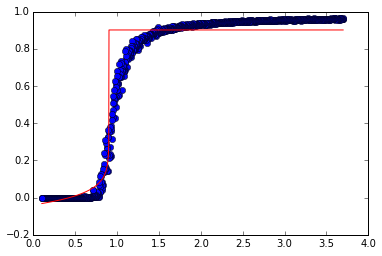

In [37]:
popt_ED5, pcov_ED5 = curve_fit(ED_fit, T5, ED5, p0=[-1.73388427588,0.9, 0.389945306654,0.99720698162])
perr_ED5 = np.sqrt(np.diag(pcov_ED5))
G5=popt_ED5[0]
G5_err=perr_ED5[0]
print('G5=', G5, '+/-', G5_err)
TcED_5=popt_ED5[1]
TcED_5_err=perr_ED5[1]
print('TcED_5=', TcED_5, '+/-', TcED_5_err)
e5=popt_ED5[2]
e5_err=perr_ED5[2]
print('e5=', e5, '+/-', e5_err)
edk5=popt_ED5[3]
edk5_err=perr_ED5[3]
print('edk5=', edk5, '=/-', edk5_err)
plt.plot(T5,ED5,'bo')
plt.plot(T5,ED_fit(T5,G5,TcED_5,e5,edk5),'r-')
plt.show()

F1_5= 0.00094827260823 +/- 0.000134388412187
F2_5= 0.00236723344871 +/- 8.80617319853e-05
TcD_5= 0.900149081222 +/- 0.000413347274635
d1_5= 0.432044558113 +/- 0.042523595645
d2_5= 0.480929790043 +/- 0.0146234688701


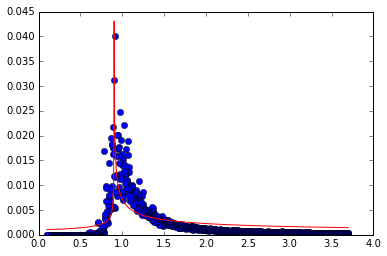

In [38]:
popt_D5, pcov_D5 = curve_fit(fit_func2, T5, D5, p0=[16.0491890468,8.51931186886,  0.900595641448 , 0.428135431794,0.523379315779])
perr_D5 = np.sqrt(np.diag(pcov_D5))
F1_5=popt_D5[0]
F1_5_err=perr_D5[0]
print('F1_5=', F1_5, '+/-', F1_5_err)
F2_5=popt_D5[1]
F2_5_err=perr_D5[1]
print('F2_5=', F2_5, '+/-', F2_5_err)
TcD_5=popt_D5[2]
TcD_5_err=perr_D5[2]
print('TcD_5=', TcD_5, '+/-', TcD_5_err)
d1_5=popt_D5[3]
d1_5_err=perr_D5[3]
print('d1_5=', d1_5, '+/-', d1_5_err)
d2_5=popt_D5[4]
d2_5_err=perr_D5[4]
print('d2_5=', d2_5, '+/-', d2_5_err)
plt.plot(T5,D5,'bo')
plt.plot(T5,fit_func2(T5,F1_5,F2_5,TcD_5,d1_5,d2_5),'r-')
plt.show()

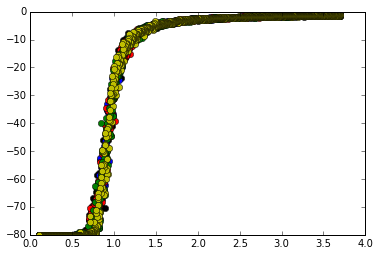

In [45]:
plt.plot(T1,E1,'ko',label='$\rho_{EPR}=0.1$')
plt.plot(T2,E2,'bo',label='$\rho_{EPR}=0.2$')
plt.plot(T3,E3,'ro',label='$\rho_{EPR}=0.4$')
plt.plot(T4,E4,'go',label='$\rho_{EPR}=0.5$')
plt.plot(T5,E5,'yo',label='$\rho_{EPR}=0.8$')
plt.show()

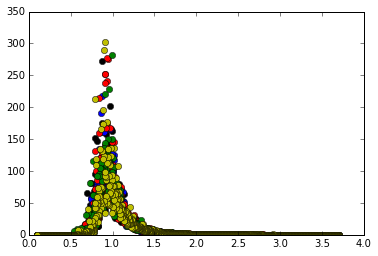

In [46]:
plt.plot(T1,CV1,'ko',label='$\rho_{EPR}=0.1$')
plt.plot(T2,CV2,'bo',label='$\rho_{EPR}=0.2$')
plt.plot(T3,CV3,'ro',label='$\rho_{EPR}=0.4$')
plt.plot(T4,CV4,'go',label='$\rho_{EPR}=0.5$')
plt.plot(T5,CV5,'yo',label='$\rho_{EPR}=0.8$')
plt.show()

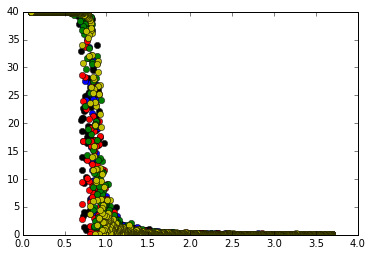

In [47]:
plt.plot(T1,abs(M1),'ko',label='$\rho_{EPR}=0.1$')
plt.plot(T2,abs(M2),'bo',label='$\rho_{EPR}=0.2$')
plt.plot(T3,abs(M3),'ro',label='$\rho_{EPR}=0.4$')
plt.plot(T4,abs(M4),'go',label='$\rho_{EPR}=0.5$')
plt.plot(T5,abs(M5),'yo',label='$\rho_{EPR}=0.8$')
plt.show()

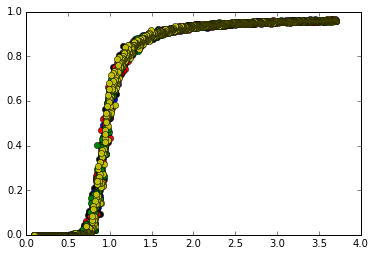

In [48]:
plt.plot(T1,ED1,'ko',label='$\rho_{EPR}=0.1$')
plt.plot(T2,ED2,'bo',label='$\rho_{EPR}=0.2$')
plt.plot(T3,ED3,'ro',label='$\rho_{EPR}=0.4$')
plt.plot(T4,ED4,'go',label='$\rho_{EPR}=0.5$')
plt.plot(T5,ED5,'yo',label='$\rho_{EPR}=0.8$')
plt.show()

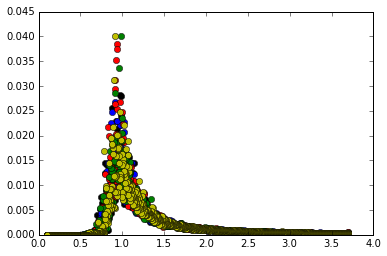

In [49]:
plt.plot(T1,D1,'ko',label='$\rho_{EPR}=0.1$')
plt.plot(T2,D2,'bo',label='$\rho_{EPR}=0.2$')
plt.plot(T3,D3,'ro',label='$\rho_{EPR}=0.4$')
plt.plot(T4,D4,'go',label='$\rho_{EPR}=0.5$')
plt.plot(T5,D5,'yo',label='$\rho_{EPR}=0.8$')
plt.show()